# Tools & libraries

In [2]:
import pandas as pd
import numpy as np

In [14]:
#importing lending club data (https://github.com/dosei1/Lending-Club-Loan-Data/blob/master/loans_2007.csv), CSV import instead of direct import from Git
loans = pd.read_csv('loans_2007.csv', error_bad_lines=False)

In [4]:
#showing data snapshot (e.g. print top 5 rows of the data)
print(loans.head())

   loan_amnt  int_rate  installment  emp_length  annual_inc  loan_status  \
0     5000.0     10.65       162.87          10     24000.0            1   
1     2500.0     15.27        59.83           0     30000.0            0   
2     2400.0     15.96        84.33          10     12252.0            1   
3    10000.0     13.49       339.31          10     49200.0            1   
4     5000.0      7.90       156.46           3     36000.0            1   

   zip_code    dti  delinq_2yrs  fico_range_high  ...  purpose_major_purchase  \
0       860  27.65          0.0            739.0  ...                     0.0   
1       309   1.00          0.0            744.0  ...                     0.0   
2       606   8.72          0.0            739.0  ...                     0.0   
3       917  20.00          0.0            694.0  ...                     0.0   
4       852  11.20          0.0            734.0  ...                     0.0   

   purpose_medical  purpose_moving  purpose_other  purpo

In [5]:
#showing data dimensions (columns x rows)
df_shape = loans.shape
print('Data dimesnions:\nrows: {0[0]}\ncolumns: {0[1]}'.format(df_shape))

Data dimesnions:
rows: 39252
columns: 41


In [7]:
#listing variables in the data + variable type (numeric, character, float, etc.)
loans.dtypes

loan_amnt                              float64
int_rate                               float64
installment                            float64
emp_length                               int64
annual_inc                             float64
loan_status                              int64
zip_code                                 int64
dti                                    float64
delinq_2yrs                            float64
fico_range_high                        float64
inq_last_6mths                         float64
open_acc                               float64
pub_rec                                float64
revol_bal                              float64
revol_util                             float64
total_acc                              float64
last_fico_range_high                   float64
home_ownership_MORTGAGE                float64
home_ownership_NONE                    float64
home_ownership_OTHER                   float64
home_ownership_OWN                     float64
home_ownershi

In [8]:
#finding max and min loan amounts
maximum_values = loans['loan_amnt'].max(skipna=True)
minimum_values = loans['loan_amnt'].min(skipna=True)
#print(maximum_values)
print('Minimum loan amount: {}\nMaximum loan amount: {}'.format(maximum_values, minimum_values))

Minimum loan amount: 35000.0
Maximum loan amount: 500.0


In [9]:
#average loan amount
data_mean = loans['loan_amnt'].mean()
print('Average loan amount: {}'.format(data_mean))

Average loan amount: 11137.18027106899


In [11]:
#count of loans by it's purpose
(loans.filter(regex='purpose')== 1).sum()

purpose_car                    1536
purpose_credit_card            5079
purpose_debt_consolidation    18376
purpose_educational             325
purpose_home_improvement       2951
purpose_house                   372
purpose_major_purchase         2184
purpose_medical                 690
purpose_moving                  582
purpose_other                  3938
purpose_renewable_energy        103
purpose_small_business         1797
purpose_vacation                378
purpose_wedding                 941
dtype: int64

In [13]:
#list of top 10 loans loan amounts & their purposes
keys = [c for c in loans if c.startswith('purpose_')]
loans_purpose = pd.melt(loans, id_vars='loan_amnt', value_vars=keys, value_name='key')
loans_purpose.loc[loans_purpose['key'] == 1].sort_values(by= 'loan_amnt', ascending = False).head(10)

,loan_amnt,variable,key
94833,35000.0,purpose_debt_consolidation,1.0
91852,35000.0,purpose_debt_consolidation,1.0
82394,35000.0,purpose_debt_consolidation,1.0
91560,35000.0,purpose_debt_consolidation,1.0
357903,35000.0,purpose_other,1.0
91643,35000.0,purpose_debt_consolidation,1.0
91644,35000.0,purpose_debt_consolidation,1.0
82299,35000.0,purpose_debt_consolidation,1.0
91695,35000.0,purpose_debt_consolidation,1.0
357475,35000.0,purpose_other,1.0


# Visualization

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [27]:
df = pd.read_csv('loans_2007.csv', error_bad_lines=False)

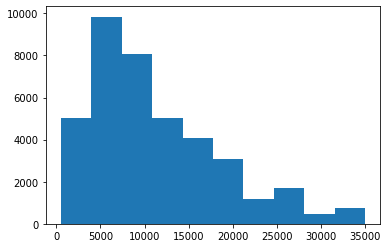

In [29]:
#prints a histogram for loan amount

x = df['loan_amnt'].unique()
y = x.sort()
plt.hist(df['loan_amnt'],y)
plt.show()


Text(0.5, 1.0, 'Sum of Loan Amount per Purpose')

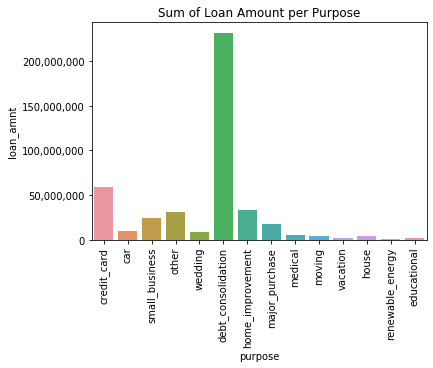

In [30]:
#prints a bar chart with sum of loan amount per purpose
df['purpose'] = df.filter(regex='purpose').eq(1).apply(lambda x: ', '.join(x[x].index), axis = 1).str[8:]

fig, ax = plt.subplots()
ax = sns.barplot(x='purpose', y='loan_amnt', data=df, estimator=sum, ci=None)
plt.xticks(rotation=90)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set_title('Sum of Loan Amount per Purpose')


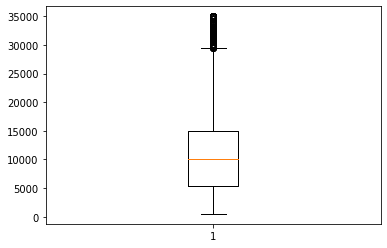

50%    10000.0
min      500.0
max    35000.0
25%     5400.0
75%    15000.0
Name: loan_amnt, dtype: float64

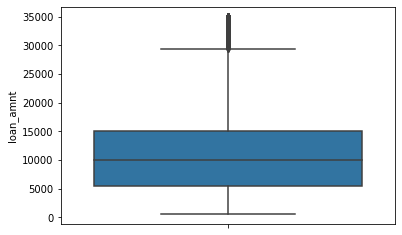

In [32]:
#prints a boxplot for loan amount, print median + min + max + Q1+ Q3 + outliers and comment your findings

x = array = df['loan_amnt']
plt.boxplot(x)
plt.show()

sns.boxplot(y = 'loan_amnt', data=df)

df['loan_amnt'].describe()[['50%', 'min', 'max', '25%', '75%']]


#75% percent of granted loans are bigger than 5,000.  
#oans amounted from 30,000 to 35,000 are considered as outliers (differs significantly from other values)
#data distribution is positive skewed, i.e. mass of the distribution occurs on the lower side
#relatively low loans 

In [33]:
# Outliers

Q1 = df['loan_amnt'].quantile(0.25)
Q3 = df['loan_amnt'].quantile(0.75)
IQR = Q3 - Q1
df['outlier'] = (df['loan_amnt'] < (Q1 - 1.5 * IQR)) | (df['loan_amnt'] > (Q3 + 1.5 * IQR)).astype(int)
df['outlier_int'] = df['outlier'].astype(int)
df[df['outlier_int']==1]

,loan_amnt,int_rate,installment,emp_length,annual_inc,loan_status,zip_code,dti,delinq_2yrs,fico_range_high,...,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months,purpose,outlier,outlier_int
30,31825.0,7.90,995.82,5,75000.0,1,80,14.03,0.0,764.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,debt_consolidation,True,1
77,35000.0,17.27,551.84,3,150000.0,1,115,7.51,0.0,729.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,home_improvement,True,1
122,35000.0,8.90,1111.37,6,125000.0,1,928,22.71,0.0,744.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,debt_consolidation,True,1
179,35000.0,10.65,1140.07,2,168000.0,1,775,3.17,1.0,764.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,debt_consolidation,True,1
203,29500.0,20.30,786.51,6,83000.0,1,880,20.93,0.0,694.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,debt_consolidation,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19330,32000.0,20.85,863.01,5,62400.0,1,18,13.04,0.0,689.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,debt_consolidation,True,1
19341,32000.0,19.74,843.19,8,93500.0,1,112,16.36,0.0,674.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,debt_consolidation,True,1
19355,30000.0,16.40,735.94,6,110000.0,1,117,9.03,0.0,744.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,debt_consolidation,True,1
19368,30000.0,17.88,759.85,10,360000.0,1,111,11.35,0.0,714.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,debt_consolidation,True,1


Text(0, 0.5, 'Loan amount')

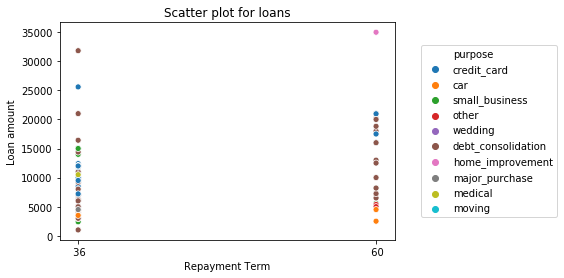

In [36]:
#print scatter plot for loans (y-axis for loans amount, x-axis for loan repayment term, color for purpose)

df['repayment'] = df.filter(regex='term_').eq(1).apply(lambda x: ', '.join(x[x].index), axis = 1).str[5:8]

ax = sns.scatterplot(x=df['repayment'].head(100), y=df['loan_amnt'].head(100), hue = df['purpose'].head(100))
ax.legend(loc='center right', bbox_to_anchor=(1.5, 0.5), ncol=1)
ax.set_title('Scatter plot for loans')
ax.set_xlabel('Repayment Term')
ax.set_ylabel('Loan amount')

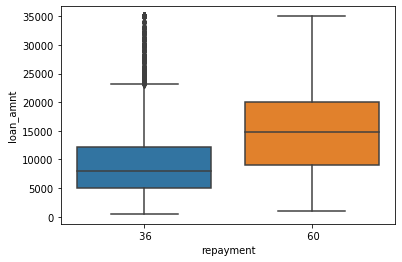

In [37]:
# bxlots is better for comparison
sns.boxplot(x = 'repayment', y = 'loan_amnt', data=df)